# Customer Personality Analysis

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("marketing_campaign.csv",sep = "\t")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [3]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [4]:
print("Total number of sum entries: ",dataset.isnull().sum().sum())

Total number of sum entries:  24


In [5]:
dataset.dropna(axis=0, inplace=True)
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Subsetting Dataset

In [7]:
who_is_customer = dataset[["ID","Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome","Recency"]]
products = dataset[["ID","Dt_Customer","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
customer_campaign = dataset[["ID","NumDealsPurchases","AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5","Response"]]
platforms = dataset[["ID","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]
customer_responses = dataset[["ID","Complain","Z_CostContact", "Z_Revenue"]]

# EDA

In [8]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

## Customer Profile

In [9]:
who_is_customer["Age"] = 2022 - who_is_customer["Year_Birth"]
who_is_customer["Age"].describe()

count    2216.000000
mean       53.179603
std        11.985554
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [10]:
who_is_customer["MeanPur"] = (dataset['MntWines']+dataset['MntFruits']+dataset['MntMeatProducts']+dataset['MntFishProducts']+dataset['MntSweetProducts']+dataset['MntGoldProds'])/6
who_is_customer["MeanPur"]

0       269.500000
1         4.500000
2       129.333333
3         8.833333
4        70.333333
           ...    
2235    223.500000
2236     74.000000
2237    206.833333
2238    140.500000
2239     28.666667
Name: MeanPur, Length: 2216, dtype: float64

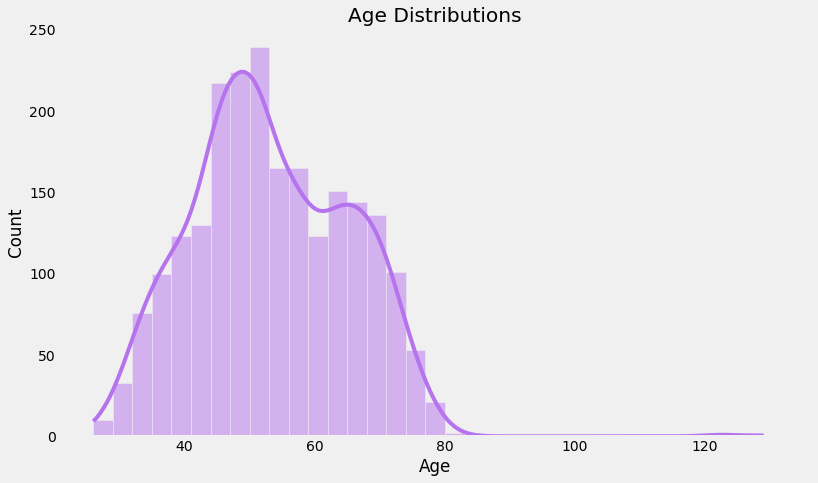

In [11]:
plt.figure(figsize=(12,7))
plt.title("Age Distributions")
sns.histplot(x=who_is_customer["Age"], kde=True, bins="auto", binwidth=3, color="#b574ed")
plt.grid(False)
plt.show()

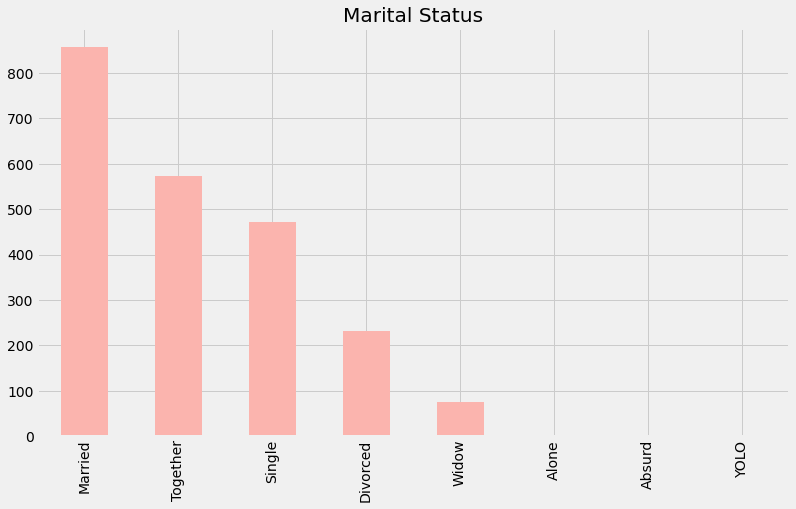

In [12]:
plt.figure(figsize=(12,7))
plt.title("Marital Status")
who_is_customer["Marital_Status"].value_counts().plot(kind="bar", colormap="Pastel1")
plt.show()

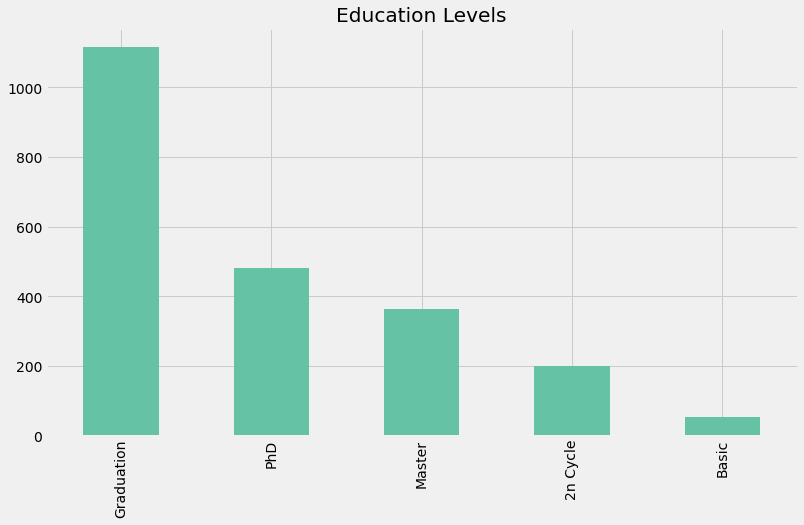

In [13]:
plt.figure(figsize=(12,7))
plt.title("Education Levels")
who_is_customer["Education"].value_counts().plot(kind="bar", colormap="Set2")
plt.show()

In [14]:
age_bins = np.arange(who_is_customer["Age"].min(), who_is_customer["Age"].max(), 10, dtype="int")
age_bins


array([ 26,  36,  46,  56,  66,  76,  86,  96, 106, 116, 126])

In [15]:
customer_age_groups = pd.cut(who_is_customer["Age"], bins=age_bins, include_lowest=True)
who_is_customer["Age_group"] = customer_age_groups

In [16]:
grouped_ages = who_is_customer.groupby("Age_group", as_index=True).mean()
grouped_ages

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Age,MeanPur
Age_group,,,,,,,,
"(25.999, 36.0]",5563.663102,1988.786096,47510.342246,0.449198,0.000000,46.684492,33.213904,107.589127
"(36.0, 46.0]",5761.557769,1979.689243,48057.587649,0.617530,0.276892,49.264940,42.310757,83.410691
"(46.0, 56.0]",5407.617994,1970.951327,50479.321534,0.545723,0.570796,48.237463,51.048673,92.109390
"(56.0, 66.0]",5725.651546,1960.602062,55980.030928,0.270103,0.740206,50.731959,61.397938,112.704467
"(66.0, 76.0]",5531.494083,1951.488166,58190.713018,0.245562,0.692308,49.215976,70.511834,120.542406
"(76.0, 86.0]",5136.956522,1943.782609,67237.217391,0.000000,0.000000,45.565217,78.217391,175.797101
"(86.0, 96.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(96.0, 106.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(106.0, 116.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
grouped_education = who_is_customer.groupby("Education", as_index=True).mean()
grouped_education

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Age,MeanPur
Education,,,,,,,,
2n Cycle,5553.565000,1972.030000,47633.190000,0.475000,0.410000,48.510000,49.970000,82.488333
Basic,5396.407407,1977.462963,20306.259259,0.629630,0.092593,48.444444,44.537037,13.632716
Graduation,5663.455197,1969.636201,52720.373656,0.440860,0.491935,49.879928,52.363799,103.614397
Master,5370.687671,1966.947945,52917.534247,0.457534,0.534247,47.317808,55.052055,101.627854
PhD,5615.291060,1966.043659,56145.313929,0.397089,0.600832,48.559252,55.956341,112.788981


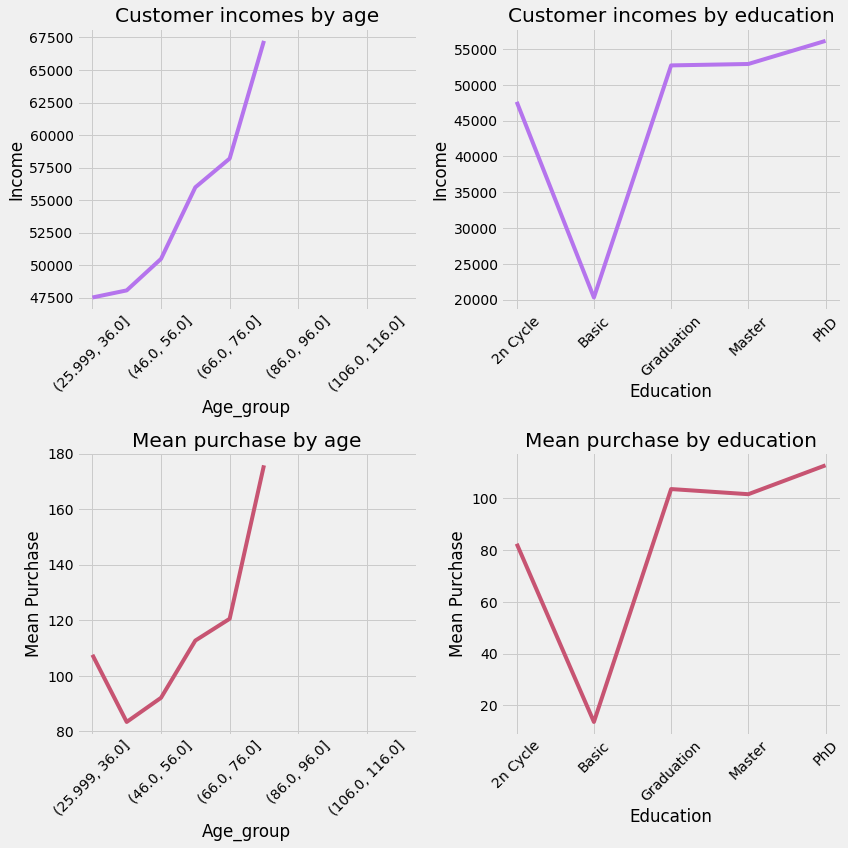

In [18]:
plt.figure(figsize=(12,12))
plt.subplot(221)
grouped_ages["Income"].plot(color="#b574ed", rot=45)
plt.title("Customer incomes by age")
plt.ylabel("Income")

plt.subplot(222)
grouped_education["Income"].plot(color="#b574ed", rot=45)
plt.title("Customer incomes by education")
plt.ylabel("Income")

plt.subplot(223)
grouped_ages["MeanPur"].plot(color="#c75472", rot=45)
plt.title("Mean purchase by age")
plt.ylabel("Mean Purchase")

plt.subplot(224)
grouped_education["MeanPur"].plot(color="#c75472", rot=45)
plt.title("Mean purchase by education")
plt.ylabel("Mean Purchase")
plt.tight_layout()
plt.show()

## Store Statistics

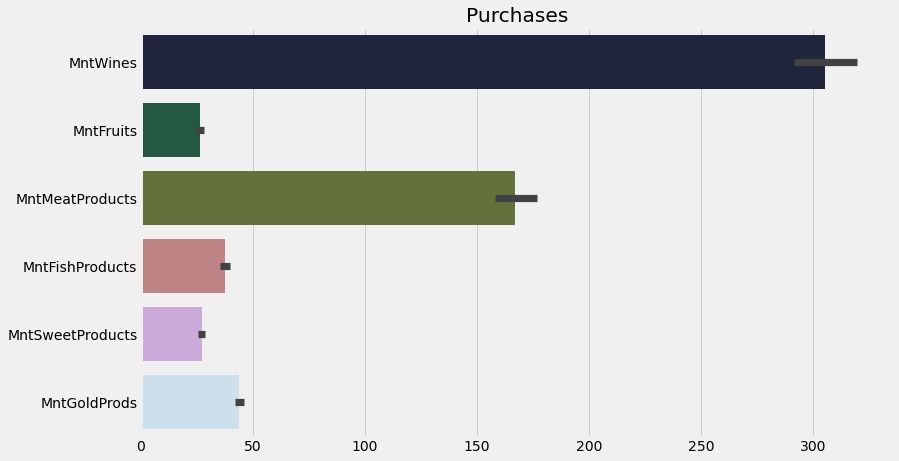

In [19]:
plt.figure(figsize=(12,7))
plt.title("Purchases")
sns.barplot(data=products.drop("ID",axis=1), orient="h", palette="cubehelix")
plt.show()

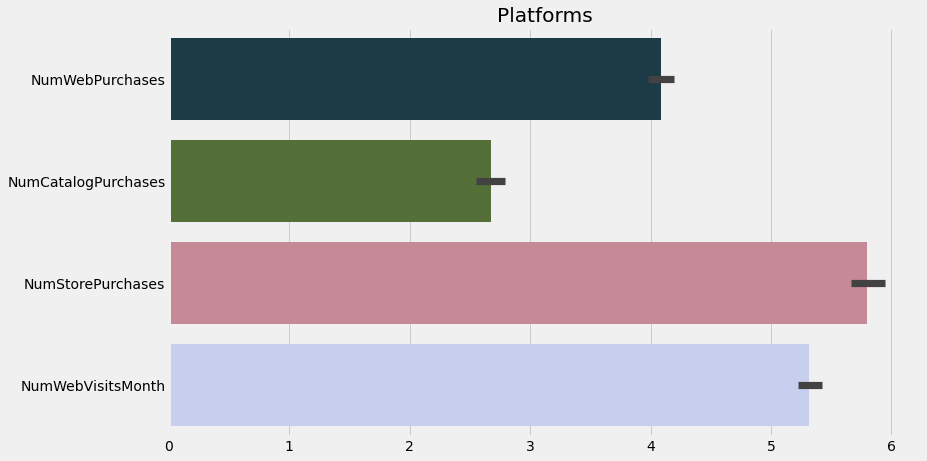

In [20]:
plt.figure(figsize=(12,7))
plt.title("Platforms")
sns.barplot(data=platforms.drop("ID",axis=1), orient="h", palette="cubehelix")
plt.show()

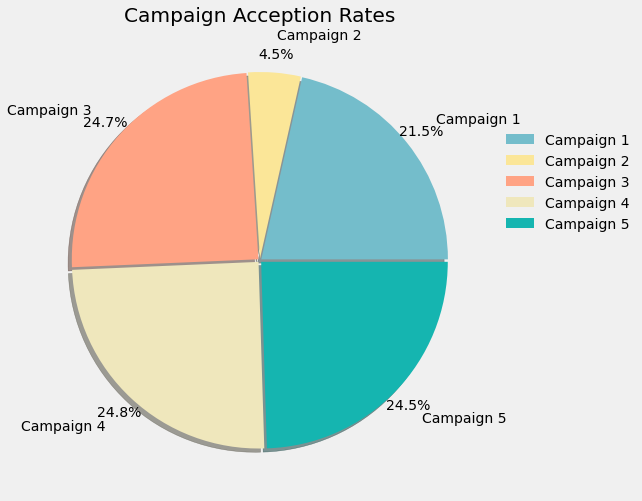

In [21]:
camp1_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp1"] == 1]) / len(dataset)
camp2_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp2"] == 1]) / len(dataset)
camp3_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp3"] == 1]) / len(dataset)
camp4_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp4"] == 1]) / len(dataset)
camp5_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp5"] == 1]) / len(dataset)

plt.figure(figsize=(10,8))
plt.title("Campaign Acception Rates")
plt.pie([camp1_rate,camp2_rate,camp3_rate,camp4_rate,camp5_rate], labels=["Campaign 1","Campaign 2","Campaign 3","Campaign 4","Campaign 5"],  colors=["#74BDCB","#FBE698","#FFA384","#EFE7BC","#15B5B0"],autopct="%1.1f%%", startangle=0, pctdistance=1.1,labeldistance=1.2, shadow=True, explode=(0.01,0.01,0.01,0.01,0.01))
plt.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()
plt.show()

## Customer Responses

In [22]:
customer_responses.head()

,ID,Complain,Z_CostContact,Z_Revenue
0,5524,0,3,11
1,2174,0,3,11
2,4141,0,3,11
3,6182,0,3,11
4,5324,0,3,11


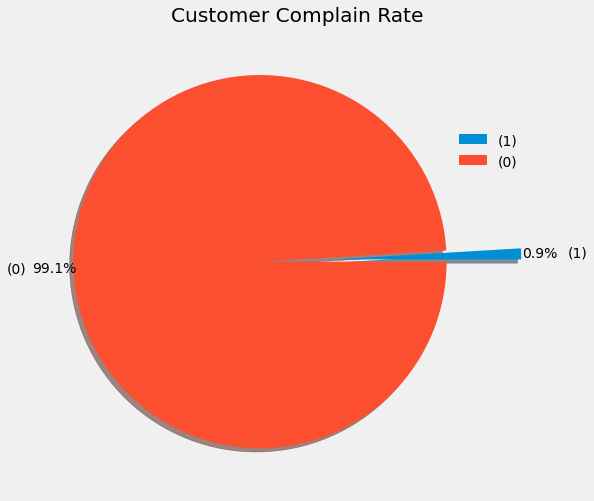

In [23]:
complains = len(customer_responses[customer_responses["Complain"] == 1])/len(customer_responses)
no_complains = len(customer_responses[customer_responses["Complain"] == 0])/len(customer_responses)

plt.figure(figsize=(10,8))
plt.title("Customer Complain Rate")
plt.pie([complains, no_complains], labels=["(1)","(0)"], autopct='%1.1f%%', startangle=0, pctdistance=1.1,labeldistance=1.25, explode=(0.2,0.2), shadow=True)

plt.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()
plt.show()